In [1]:
# To make data visualisations display in Jupyter Notebooks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seeds_df = pd.read_csv('seeds.csv')

In [3]:
seeds_df.head() #these are some of the characteristics of seeds

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [4]:
seeds_df.shape

(210, 7)

In [ ]:
#Now there are various characteristics of seeds & based on that we want to differentiate seeds into different groups or clusters
#Yaha hume categories nikalni h we dont want to predict anything so we don't need to divide the data into X & Y like 
#we used to do,this is unsupervised learning.

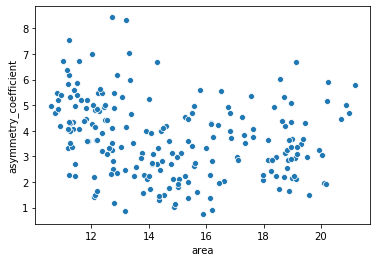

In [5]:
sns.scatterplot(x='area',y='asymmetry_coefficient',data=seeds_df)

In [ ]:
#^O/P=This is incomplete graph as we have considered only 2 parameters not all 7

### Let's perform algorithm

In [ ]:
#Firstly we will detect  outliers  and then will remove them

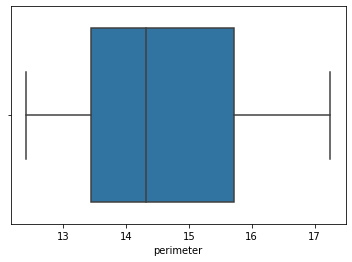

In [6]:
sns.boxplot(seeds_df['perimeter'])

In [ ]:
#^O/P= We don't have Outliers here similarly we can check outliers for other parameters also but ideally  we don't do it.

# Scaling of Data

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
seeds_df_sc = sc.fit_transform(seeds_df)

In [ ]:
#^O/P=so if we see seeds_df_sc now it will look like 0.732,1.218 something like this everything has changed 
# into z-scale,every column has been converted from its respective scale to z-scale

### Find out the optimum number of clusters

### 1.Elbow Method

### Within cluster sum of squares(Wcss)Vs Number of clusters

In [ ]:
#Jaise-Jaise hum number of clusters increase krte jayenge humara WCSS kum hota jayega it will be a downward slopping line, lower
#the value of WCSS(Y-AXIS) the better it is but it should also be in mind that we don't unneccessary want to divide data into
#too many categories

In [8]:
from sklearn.cluster import KMeans

no_of_clusters = range(1,8)
wcss = []

for k in no_of_clusters:
    # Create a KMeans instance with k clusters
    model = KMeans(n_clusters=k, random_state=1)
    
    model.fit(seeds_df_sc)
    
    wcss.append(model.inertia_)

In [ ]:
#^1)yaha KMeans no. of clusters=k which is 1 here,basically it is partioning in centroid form in the starting.
#2)yaha Xtrain nhi h jo fit m dalte thhe isliye yaha full data hi daal denge .
#3)WCSS kitna h model m wo hum 'inertia' attribute se pta kr skte h

In [9]:
wcss #o/p ye wcss ki values aa gyi=1470,659.1717,430.658,371.5811

[1470.0,
 659.1717544870405,
 430.65897315130053,
 371.58119097155236,
 326.2289168297264,
 288.9533468668286,
 262.7906049996619]

### Plot a graph between WCSS and no of clusters

Text(0, 0.5, 'WCSS')

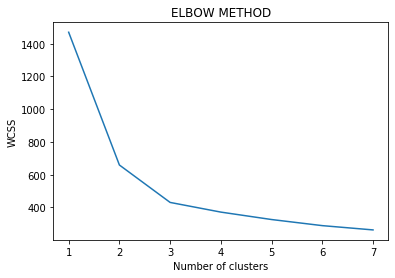

In [10]:
plt.plot(no_of_clusters,wcss);
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
#^O/P=Either 2(min.)or 3(max.) clusters we need as optional clusters,ye sab humare business model pr depend krta h sometimes jb 
#zyada complex nhi krna toh 2 clusters bna lete h and sometimes jb zyada depth m jana hota h toh 3 clusters bhi bna lete h.

### 2.Average silhoutte Method

In [ ]:
#Yaha hume milega different no. of clusters k liye ab hum WCSS nhi nikalenge we will find the silhoutte coefficient for differnt
# no. of clusters & higher the value of silhotte coeff. the better fit it is within the cluster

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
no_of_clusters = list(range(2,8))
silhoutte_score_list = []

for k in no_of_clusters:
    model = KMeans(n_clusters=k, random_state=1)
    cluster_labels = model.fit_predict(seeds_df_sc)
    silhoutte_score_list.append(silhouette_score(seeds_df_sc,cluster_labels))

In [ ]:
#^1)Silhotte score 1 cluster k liye nhi nikalte isliye we want atleast 2 clusters so that we start with 2 clusters in case of 
#Silhotte method.
#2)Here rather than just the fit method we will also call the predict method parallely so fit_predict call krenge as it will not
#only fit but predict the labels also.Let's say we are trying to divide the data into 2 clusters 0 &1 and kuch rows ko ye divide
#krke 0 m daal dega and kuch ko divide krke 1 m daal dega so it is going to predict the label for each row for each seed ki wo
#seed 0 ko belong krta h ya 1 ko.This is going to predict.
#3)ye  silhoutte_score metrics h ye find out krne k liye hume dono chize deni pdegi ek toh data bhi dena pdega dusra humne jo
#cluster labels banaye h ye bhi dena pdega & it will give us the value of silhouttescore which we are appending in the list,so 
#now we have a list ready which has the silhotte scores.

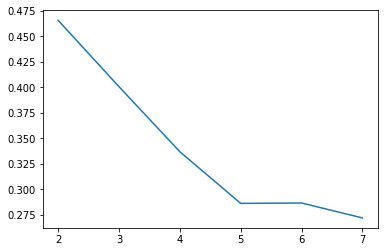

In [13]:
plt.plot(no_of_clusters,silhoutte_score_list)

In [ ]:
#^O/p=jbtk silhotte score badh rha h tbtk aage jate rehna h and jb highest point pr phuch gye that is our optimum value so in 
#this case it is saying that the optimum no. of clusters is 2

In [14]:
no_of_clusters.insert(0,1)
silhoutte_score_list.insert(0,0)

In [ ]:
#^We can have 1 cluster also in the graph so no. of cluster list m humne insert krdiya 0th index pr 1 & silhotte score list
#pr 0th index pr 0 insert krdiya

Text(0, 0.5, 'Silhoutte Score')

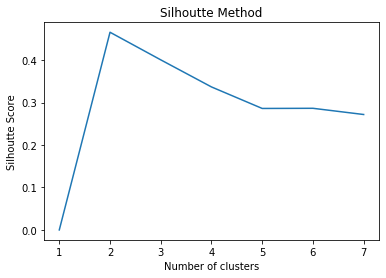

In [15]:
plt.plot(no_of_clusters,silhoutte_score_list)
plt.title('Silhoutte Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')

In [ ]:
#^O/P=Now it is much better to read,ab hum 1 se start kr rhe h & jbtk humara silhotte score highest ho rha h that is the 
#optimum no. of clusters,ye bta rha h ki 2 is the optimum no. of clusters & 3 is not that bad,ideally we should divide it in 2
#Clusters and max. if we need we can divide it upto 3.

### 3)Dendrogram

Text(0.5, 1.0, 'DENDROGRAM')

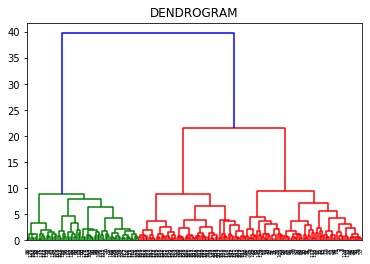

In [16]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(seeds_df_sc,method='ward'))
plt.title('DENDROGRAM')

In [ ]:
#^O/P=Ye green ,red color wale data points h and left side wala Euclidean distance h.agar iss graph  se btana ho no. of optimum
#clusters toh?hum sari horizontal lines ko extend krdenge and fir jo sabse lengthy,uncut vertical line hogi uske base pr hum
#straighting krenge so that will be the longest line & we will cut this line & see our no. of optimum cluster is 2.

##### Let's go with 2 clusters

# K-Means Clustering

In [17]:
model = KMeans(n_clusters=2, random_state=1)

In [18]:
labels = model.fit_predict(seeds_df_sc)

In [19]:
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#^O/p=First row  ki seed ko ko 1 predict kiya h fir 5th row ki seed ko 0 predict kiya h & like that

In [20]:
model.cluster_centers_

array([[ 1.14065367,  1.14788697,  0.54376886,  1.1287036 ,  1.06661287,
        -0.14652535,  1.1496198 ],
       [-0.66037844, -0.66456614, -0.31481355, -0.65345998, -0.61751272,
         0.08483047, -0.66556936]])

In [ ]:
#^O/P=jo centroid humare final bnte h uske coordinates pehle 7 jo h wo coordinates h of 7 columns and fir 2 coordinates h of
# 2 clusters,ye jo centroids ki positions aayi uske coordinates h.

In [21]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [ ]:
#^now iss data m hum last m 1 column add krlete h,'type of seed' k name se ya toh 20 0 hoga ya 1

In [22]:
seeds_df['Type'] = labels

In [23]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [24]:
#let's see characteristic of seeds
seeds_df.groupby('Type').mean()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
Type,,,,,,,
0,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740
1,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737


In [ ]:
#^O/p=type 0 k ye characteristics h 1 k liye ye ,so that we can see that type 0  seeds are bigger seeds

In [25]:
#We can give that name also
seeds_df.loc[seeds_df['Type']==0,'Type'] = "Big Seeds"
seeds_df.loc[seeds_df['Type']==1,'Type'] = "Small Seeds"

In [26]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Small Seeds
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Small Seeds
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Small Seeds
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Small Seeds
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Big Seeds


In [27]:
#How many seeds are classified as small and big
seeds_df['Type'].value_counts()

Small Seeds    133
Big Seeds       77
Name: Type, dtype: int64

### Hierarchial Clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
labels_new = model.fit_predict(seeds_df_sc)

In [29]:
labels_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
#^O/p= ye ab agglomerative k hisab se labels bn gye

In [ ]:
#When we have multi dimensional data like this(7) and we want to narrow it down to 2 principal components then we can
# use principal components analysis.

In [30]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2).fit_transform(seeds_df_sc)

In [ ]:
#^O/P=yaha hum fit_transform lgayenge & we will give our data jise hume transform krna h.ab humara data 2 components m narrow 
#down hogya,now ab 7 dimemsions ki jagah humara data 2 dimension m aagya h 2 principal components m & now we can visualise it
#like scatter plot

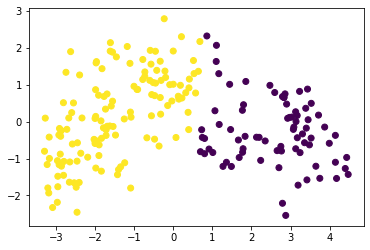

In [31]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels)

In [ ]:
#^Here c= colouring mtlb colour coding kis basis pr krni h labels k basis pr krni h and[:,0] mtlb 0 column ka data le liya 
#pca_data[:,1]ka mtlb 1 column ka data le liya : means all the rows bcz we want just 2 columns so n_components=2

In [ ]:
#Theory=PCA m yahi horha h hum 7 dimensions ko 2 dimensions m convert kr rhe h and agar 2 dimensions ko 1 dimension m change 
# krna  h toh rather than these 2 dimensions we will summarize the data to this 1 dimension now we dont need 2 dimension this 
#1 dimension is enough for us.like this we can have 7 dimensions but jb hum unn 7 ko plot kr rhe h 7 planes m toh 2 koi 
#planes m uss data k across aise bnayenge jo humare max. variation ko explain kr pa rhe h.

In [ ]:
#When we have 210 components we cut 2 lines which are able to explain the max. variation and those 2 dimension become our 2 prin
#_cipal components and unhi ko humne scatter plot pr dikhaya h.